## Requirements
#### - clean the data set. 
#### - '*' in HS represents the player is not out. Form a new column to represent the respective. 
#### - visualize the total proportion of players by country. 
#### - compare the number of matches played by each country. 
#### - compare the total runs scored by each country. 
#### - compare the total runs scored by each Australian player.


### Importing required libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing and understanding the dataset:

In [2]:
df = pd.read_csv('CricketTestMatchData.csv')

In [3]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1


In [4]:
df.shape

(67, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  67 non-null     object 
 1   Span    67 non-null     object 
 2   Mat     67 non-null     int64  
 3   Inns    67 non-null     int64  
 4   NO      67 non-null     int64  
 5   Runs    67 non-null     int64  
 6   HS      67 non-null     object 
 7   Ave     67 non-null     float64
 8   BF      64 non-null     object 
 9   SR      64 non-null     float64
 10  100     67 non-null     int64  
 11  50      67 non-null     int64  
 12  0       67 non-null     int64  
 13  4s      67 non-null     int64  
 14  6s      67 non-null     int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 8.0+ KB


### Data cleaning:

#### renaming columns

In [6]:
df.rename(columns = {
    'Mat' : 'Matches', 
    'NO' : 'Not_Outs', 
    'HS' : 'Highest_Inns_Score', 
    'BF' : 'Balls_Faced', 
    'SR' : 'Strike_Rate'
}, inplace = True)

In [7]:
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1


#### checking and filling null values

In [8]:
df.isna().sum()

Player                0
Span                  0
Matches               0
Inns                  0
Not_Outs              0
Runs                  0
Highest_Inns_Score    0
Ave                   0
Balls_Faced           3
Strike_Rate           3
100                   0
50                    0
0                     0
4s                    0
6s                    0
dtype: int64

In [9]:
df[df['Balls_Faced'].isna() == True]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,NaN,15,19,6,258,2
17,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,NaN,NaN,15,14,1,107,11
59,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,NaN,NaN,5,6,3,51,0


In [10]:
df[df['Strike_Rate'].isna() == True]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,NaN,15,19,6,258,2
17,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,NaN,NaN,15,14,1,107,11
59,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,NaN,NaN,5,6,3,51,0


In [11]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

In [12]:
df[df.index.isin([9,17,59])]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,NaN,15,19,6,258,2
17,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,NaN,15,14,1,107,11
59,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,0,NaN,5,6,3,51,0


In [13]:
df['Strike_Rate'] = df['Strike_Rate'].fillna(0)

In [14]:
df[df.index.isin([9,17,59])]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.0,15,19,6,258,2
17,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,0.0,15,14,1,107,11
59,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,0,0.0,5,6,3,51,0


#### checking and dropping duplicates

In [15]:
df.duplicated().sum()

5

In [16]:
df[df.duplicated(keep = False)]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1
5,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1
11,GS Sobers (WI),1954-1974,93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593,32
12,GS Sobers (WI),1954-1974,93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593,32
15,JB Hobbs (ENG),1908-1930,61,102,7,5410,211,56.94,5363+,46.22,15,28,4,276,8
16,JB Hobbs (ENG),1908-1930,61,102,7,5410,211,56.94,5363+,46.22,15,28,4,276,8
40,AB de Villiers (SA),2004-2018,114,191,18,8765,278*,50.66,16077,54.51,22,46,8,1024,64
41,AB de Villiers (SA),2004-2018,114,191,18,8765,278*,50.66,16077,54.51,22,46,8,1024,64
54,V Kohli (IND),2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26
55,V Kohli (IND),2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26


In [17]:
df.drop_duplicates(keep = 'first', inplace = True)

In [18]:
df[df.duplicated(keep = False)]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s


#### splitting the 'Span' column

In [19]:
df['Span'].str.split('-')

0     [1928, 1948]
1     [2022, 2023]
2     [2015, 2016]
3     [1963, 1970]
4     [1930, 1954]
          ...     
62    [1965, 1981]
63    [2002, 2014]
64    [1924, 1934]
65    [1930, 1938]
66    [1928, 1934]
Name: Span, Length: 62, dtype: object

In [20]:
df['First_Year'] = df['Span'].str.split('-').str[0]

In [21]:
df['Final_Year'] = df['Span'].str.split('-').str[1]

In [22]:
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954


In [23]:
df.drop(columns = 'Span', inplace = True)

In [24]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954


#### seperating country from the 'Player' column

In [25]:
df['Player']

0      DG Bradman (AUS)
1        HC Brook (ENG)
2        AC Voges (AUS)
3       RG Pollock (SA)
4       GA Headley (WI)
            ...        
62     KD Walters (AUS)
63    GC Smith (ICC/SA)
64    WH Ponsford (AUS)
65      SJ McCabe (AUS)
66     DR Jardine (ENG)
Name: Player, Length: 62, dtype: object

In [26]:
df['Player'].str.split('(')

0      [DG Bradman , AUS)]
1        [HC Brook , ENG)]
2        [AC Voges , AUS)]
3       [RG Pollock , SA)]
4       [GA Headley , WI)]
              ...         
62     [KD Walters , AUS)]
63    [GC Smith , ICC/SA)]
64    [WH Ponsford , AUS)]
65      [SJ McCabe , AUS)]
66     [DR Jardine , ENG)]
Name: Player, Length: 62, dtype: object

In [27]:
df['Player'].str.split('(').str[0].head(20)

0        DG Bradman 
1          HC Brook 
2          AC Voges 
3        RG Pollock 
4        GA Headley 
6       H Sutcliffe 
7         E Paynter 
8     KF Barrington 
9         ED Weekes 
10       WR Hammond 
11        GS Sobers 
13    KC Sangakkara 
14        SPD Smith 
15         JB Hobbs 
17       CL Walcott 
18         L Hutton 
19        JH Kallis 
20     GE Tyldesley 
21    KS Williamson 
22         CA Davis 
Name: Player, dtype: object

In [28]:
df['Player'].str.split('(').str[1].head(20)

0        AUS)
1        ENG)
2        AUS)
3         SA)
4         WI)
6        ENG)
7        ENG)
8        ENG)
9         WI)
10       ENG)
11        WI)
13        SL)
14       AUS)
15       ENG)
17        WI)
18       ENG)
19    ICC/SA)
20       ENG)
21        NZ)
22        WI)
Name: Player, dtype: object

In [29]:
df['Country'] = df['Player'].str.split('(').str[1]

In [30]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS)
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG)
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS)
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA)
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI)


In [31]:
df['Country'].head(10)

0     AUS)
1     ENG)
2     AUS)
3      SA)
4      WI)
6     ENG)
7     ENG)
8     ENG)
9      WI)
10    ENG)
Name: Country, dtype: object

In [32]:
df['Country'].str.rstrip(')')

0        AUS
1        ENG
2        AUS
3         SA
4         WI
       ...  
62       AUS
63    ICC/SA
64       AUS
65       AUS
66       ENG
Name: Country, Length: 62, dtype: object

In [33]:
df['Country'] = df['Country'].str.rstrip(')')

In [34]:
df['Country'].head(10)

0     AUS
1     ENG
2     AUS
3      SA
4      WI
6     ENG
7     ENG
8     ENG
9      WI
10    ENG
Name: Country, dtype: object

In [35]:
df.head(10)

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI
6,H Sutcliffe (ENG),54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202,6,1924,1935,ENG
7,E Paynter (ENG),20,31,5,1540,243,59.23,1288+,45.88,4,7,3,125,4,1931,1939,ENG
8,KF Barrington (ENG),82,131,15,6806,256,58.67,4957+,42.42,20,35,5,591,27,1955,1968,ENG
9,ED Weekes (WI),48,81,5,4455,207,58.61,0,0.00,15,19,6,258,2,1948,1958,WI
10,WR Hammond (ENG),85,140,16,7249,336*,58.45,7491+,38.07,22,24,4,419,27,1927,1947,ENG


In [36]:
df['Player'] = df['Player'].str.split('(').str[0]

In [37]:
df['Player'].head(10)

0        DG Bradman 
1          HC Brook 
2          AC Voges 
3        RG Pollock 
4        GA Headley 
6       H Sutcliffe 
7         E Paynter 
8     KF Barrington 
9         ED Weekes 
10       WR Hammond 
Name: Player, dtype: object

#### forming new column to represent '*' indicates not out

In [38]:
###

In [39]:
for i in df['Highest_Inns_Score']:
    if "*" in i:
        print(i)

269*
270*
336*
365*
247*
248*
400*
280*
201*
232*
203*
236*
278*
182*
215*
254*
329*
144*
189*
144*


In [40]:
list = []
for i in df['Highest_Inns_Score']:
    if "*" in i:
        list.append(i)

print(len(list))

20


In [41]:
df['Is_Out'] = df['Highest_Inns_Score'].apply(lambda x: 'No' if '*' in x else 'Yes')

In [42]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country,Is_Out
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS,Yes
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,Yes
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,No
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA,Yes
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI,No


In [43]:
df['Is_Out'].value_counts()

Is_Out
Yes    42
No     20
Name: count, dtype: int64

In [44]:
df['Highest_Inns_Score'] = df['Highest_Inns_Score'].str.rstrip('*')

In [45]:
df['Highest_Inns_Score']

0     334
1     186
2     269
3     274
4     270
     ... 
62    250
63    277
64    266
65    232
66    127
Name: Highest_Inns_Score, Length: 62, dtype: object

#### cleaning 'Balls_Faced' column

In [46]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country,Is_Out
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS,Yes
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,Yes
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,No
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA,Yes
4,GA Headley,22,40,4,2190,270,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI,No


In [47]:
df['Balls_Faced'].head(20)

0     9800+
1      1287
2      2667
3     1707+
4      416+
6     6558+
7     1288+
8     4957+
9         0
10    7491+
11    4063+
13    22882
14    18100
15    5363+
17        0
18    2844+
19    28903
20     178+
21    17006
22     665+
Name: Balls_Faced, dtype: object

In [48]:
df['Balls_Faced'] = df['Balls_Faced'].str.rstrip('+')

In [49]:
df['Balls_Faced'].head(20)

0      9800
1      1287
2      2667
3      1707
4       416
6      6558
7      1288
8      4957
9       NaN
10     7491
11     4063
13    22882
14    18100
15     5363
17      NaN
18     2844
19    28903
20      178
21    17006
22      665
Name: Balls_Faced, dtype: object

In [50]:
df['Balls_Faced'].isna().sum()

3

In [51]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

In [52]:
df['Balls_Faced'].isna().sum()

0

#### standardizing data types of each column

In [53]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country,Is_Out
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,Yes
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,Yes
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,No
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,Yes
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,No


In [54]:
df['Matches'] = df['Matches'].astype(int)

In [55]:
df['Balls_Faced'] = df['Balls_Faced'].astype(int)

In [56]:
df['Strike_Rate'] = df['Strike_Rate'].astype(float)

In [57]:
df['Highest_Inns_Score'] = df['Highest_Inns_Score'].astype(int)

In [58]:
df['First_Year'] = df['First_Year'].astype(int)
df['Final_Year'] = df['Final_Year'].astype(int)

In [59]:
df.dtypes

Player                 object
Matches                 int32
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Balls_Faced             int32
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                      int64
6s                      int64
First_Year              int32
Final_Year              int32
Country                object
Is_Out                 object
dtype: object

### Data analysis:

#### visualizng the total proportion of players by country

In [60]:
df.groupby('Country')['Player'].count().sort_values(ascending = False)

Country
AUS        16
ENG        13
WI          8
SA          5
IND         4
PAK         4
SL          3
ICC/IND     2
ICC/SA      2
NZ          2
ICC/PAK     1
ICC/WI      1
ZIM         1
Name: Player, dtype: int64

In [61]:
dfPlayers = df.groupby('Country')['Player'].count().sort_values(ascending = False)

In [62]:
dfPlayers.index

Index(['AUS', 'ENG', 'WI', 'SA', 'IND', 'PAK', 'SL', 'ICC/IND', 'ICC/SA', 'NZ',
       'ICC/PAK', 'ICC/WI', 'ZIM'],
      dtype='object', name='Country')

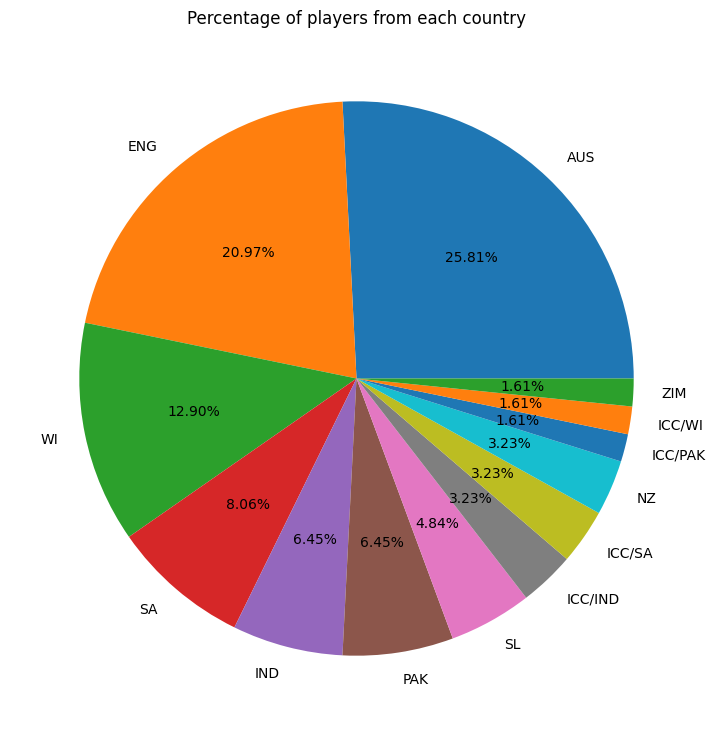

In [63]:
dfPlayers.plot(kind = 'pie', labels = dfPlayers.index, autopct = '%1.2f%%', figsize = (10,9))
plt.xlabel(None)
plt.ylabel(None)
plt.title('Percentage of players from each country')
plt.show()

#### comparing the number of matches played by each country

In [64]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country,Is_Out
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,Yes
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,Yes
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,No
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,Yes
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,No


In [65]:
df.groupby('Country')['Matches'].sum().sort_values(ascending = False)

Country
AUS        1348
ENG         684
WI          558
IND         455
SL          364
PAK         348
ICC/SA      283
ICC/IND     268
SA          234
ICC/WI      131
NZ          123
ICC/PAK     120
ZIM          63
Name: Matches, dtype: int32

In [66]:
dfMatches = df.groupby('Country')['Matches'].sum().sort_values(ascending = False)

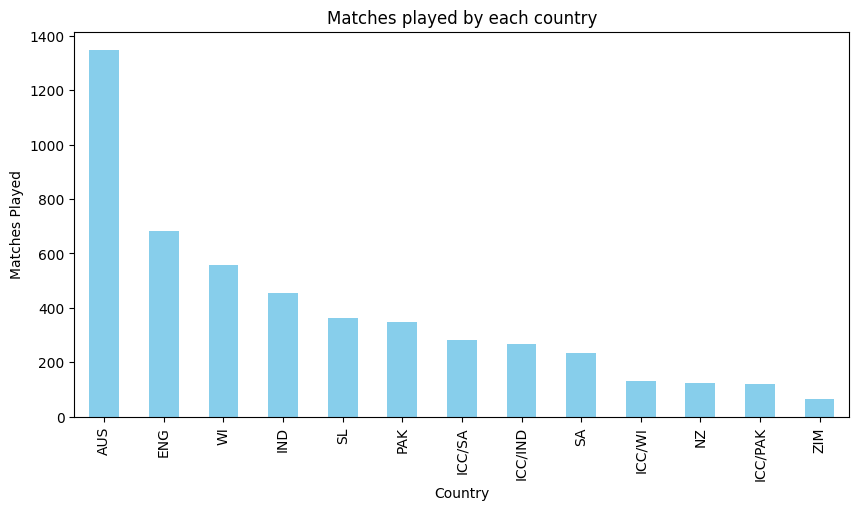

In [67]:
dfMatches.plot(kind = 'bar', color = 'skyblue', figsize = (10,5))
plt.xlabel('Country')
plt.ylabel('Matches Played')
plt.title('Matches played by each country')
plt.show()

#### comparing the total runs scored by each country

In [68]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country,Is_Out
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,Yes
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,Yes
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,No
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,Yes
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,No


In [69]:
df.groupby('Country')['Runs'].sum()

Country
AUS        106142
ENG         56141
ICC/IND     21874
ICC/PAK      8830
ICC/SA      22554
ICC/WI      11953
IND         35975
NZ          10351
PAK         27641
SA          19121
SL          29676
WI          44043
ZIM          4794
Name: Runs, dtype: int64

In [70]:
dfRuns = df.groupby('Country')['Runs'].sum()

In [71]:
dfRuns = dfRuns.to_frame().reset_index()

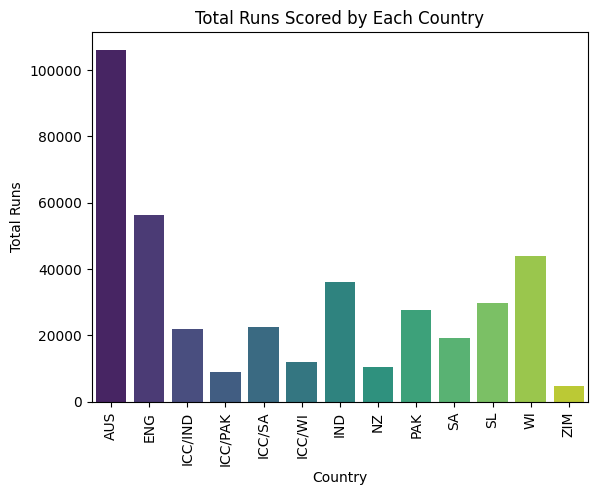

In [72]:
sns.barplot(data = dfRuns, x = 'Country', y = 'Runs', hue = 'Country', palette = 'viridis')
plt.title('Total Runs Scored by Each Country')
plt.xlabel('Country')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

#### comparing the total runs scored by each Australian player

In [73]:
df[df['Country'] == 'AUS']

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,First_Year,Final_Year,Country,Is_Out
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,Yes
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,No
14,SPD Smith,109,195,25,9685,239,56.97,18100,53.50,32,41,10,1063,54,2010,2024,AUS,Yes
24,GS Chappell,87,151,19,7110,247,53.86,13079,51.53,24,31,12,755,16,1970,1984,AUS,No
32,RT Ponting,168,287,29,13378,257,51.85,22782,58.72,41,62,17,1509,73,1995,2012,AUS,Yes
33,J Ryder,20,32,5,1394,201,51.62,2035,44.86,3,9,1,102,3,1920,1929,AUS,No
35,MEK Hussey,79,137,16,6235,195,51.52,12436,50.13,19,29,12,685,39,2005,2013,AUS,Yes
38,SR Waugh,168,260,46,10927,200,51.06,22461,48.64,32,50,22,1175,20,1985,2004,AUS,Yes
39,ML Hayden,103,184,14,8625,380,50.73,14349,60.10,30,29,14,1049,82,1994,2009,AUS,Yes
42,AR Border,156,265,44,11174,205,50.56,27002,41.09,27,63,11,1161,28,1978,1994,AUS,Yes


In [74]:
dfAUS = df[df['Country'] == 'AUS']

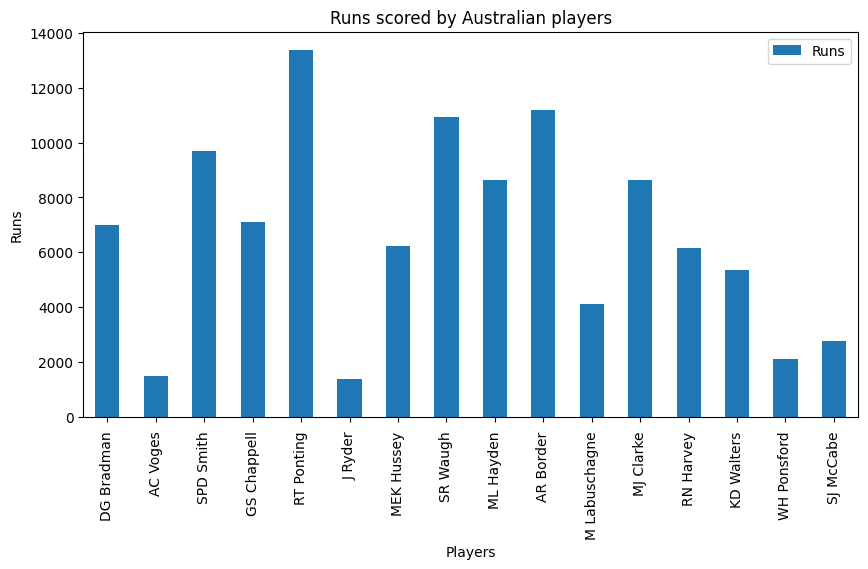

In [75]:
dfAUS.plot(kind = 'bar', x = 'Player', y = 'Runs', figsize = (10,5))
plt.xlabel('Players')
plt.ylabel('Runs')
plt.title('Runs scored by Australian players')
plt.show()